<a href="https://colab.research.google.com/github/medmac01/Movie-Recommender/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Downloading the Dataset**

In [ ]:
# No neeeed to execute this..
!pip install --user kaggle

In [ ]:
!sudo cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download grouplens/movielens-20m-dataset
!unzip movielens-20m-dataset.zip

movielens-20m-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  movielens-20m-dataset.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('rating.csv')
df.shape

(20000263, 4)

In [ ]:
df.columns
# df = df.sample(frac = 1,random_state=42)
# df = df.drop('timestamp', axis=1, inplace=False)
df = df.iloc[:200000,:]
# This is to shuffle the dataset


In [ ]:
X = df[['userId','movieId']]
# X = pd.DataFrame(df,index=df.index,columns=['userId','movieId'])
y = df['rating']
# min_rate = y.min()
# max_rate = y.max()
# y = y.apply(lambda x: ((x-min_rate)/(max_rate - min_rate)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_test.iloc[:,1].shape

(20000,)

In [ ]:
# Min Max Scaling
min_rate = y.min()
max_rate = y.max()
y = y.apply(lambda x: ((x-min_rate)/(max_rate - min_rate)))

In [ ]:
users = df.userId.unique().tolist()
num_users = {x: i for i,x in enumerate(users)}
num_users = len(num_users)
movies = df.movieId.unique().tolist()
num_movies = {x: i for i,x in enumerate(movies)}
num_movies = max(df.movieId)+1

In [ ]:
# df = df.sample(1,random_state=42)
#id = int(0.8*X.shape[0])

#X_train = X[:id]
#y_train = y[:id]
#X_test = X[id:]
#y_test = y[id:]


In [ ]:
num_movies

130220

In [93]:
# The model



# Users part
user_input = tf.keras.Input(shape=[1])
embedded_layer_users = tf.keras.layers.Embedding(num_users+1,
                                           50,
                                           embeddings_initializer='he_normal',
                                           embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(user_input)

user_flattened = tf.keras.layers.Flatten()(embedded_layer_users)

# Movies part
movie_input = tf.keras.Input(shape=[1])
embedded_layer_movies = tf.keras.layers.Embedding(num_movies+1,
                                           50,
                                           embeddings_initializer='he_normal',
                                           embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie_input)

movie_flattened = tf.keras.layers.Flatten()(embedded_layer_movies)

dot = keras.layers.concatenate([user_flattened, movie_flattened])

dense_1 = keras.layers.Dense(units=32,activation='relu')(dot)
# dense_2 = keras.layers.Dense(units=16,activation='relu')(dense_1)
dense_3 = keras.layers.Dense(units=1)(dense_1)

model = keras.Model([user_input,movie_input],dense_3)

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
from keras.utils import plot_model

In [ ]:
#print(model.summary())
#plot_model(model,show_shapes=True)

In [94]:
# Training our model
# val_data = [X_test.iloc[:,0],X_test.iloc[:,1]]
history = model.fit([X_train.iloc[:,0], X_train.iloc[:,1]], y_train, epochs=5, verbose=1, validation_data=([X_test.iloc[:,0], X_test.iloc[:,1]], y_test), batch_size=64)

Epoch 1/5
2500/2500 [==============================] - 13s 5ms/step - loss: 1.2859 - val_loss: 0.8193
Epoch 2/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7633 - val_loss: 0.7815
Epoch 3/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.7182 - val_loss: 0.7728
Epoch 4/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6883 - val_loss: 0.7781
Epoch 5/5
2500/2500 [==============================] - 15s 6ms/step - loss: 0.6613 - val_loss: 0.7743


In [87]:
model.evaluate([X_test.iloc[:,0], X_test.iloc[:,1]],y_test,verbose=True)
## smt is wrong!!

1250/1250 [==============================] - 3s 2ms/step - loss: 0.7756


0.7755545377731323

In [99]:
model.save_weights('model_weights.h5')

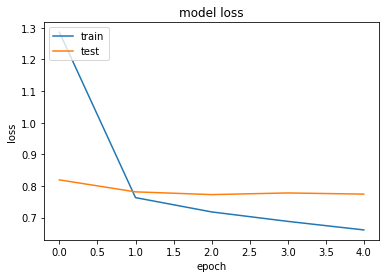

In [96]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [100]:
!ls -l

total 1209796
-rw-r--r-- 1 root root 214322450 Sep 20  2019 genome_scores.csv
-rw-r--r-- 1 root root     20363 Sep 20  2019 genome_tags.csv
-rw-r--r-- 1 root root        62 Dec 16 18:30 kaggle.json
-rw-r--r-- 1 root root    539334 Sep 20  2019 link.csv
-rw-r--r-- 1 root root  79040384 Dec 16 21:16 model.h5
-rw-r--r-- 1 root root  26355016 Dec 16 21:18 model_weights.h5
-rw-r--r-- 1 root root   1493648 Sep 20  2019 movie.csv
-rw-r--r-- 1 root root 204953792 Dec 16 18:31 movielens-20m-dataset.zip
-rw-r--r-- 1 root root 690353377 Sep 20  2019 rating.csv
drwxr-xr-x 1 root root      4096 Dec 13 14:35 sample_data
-rw-r--r-- 1 root root  21725514 Sep 20  2019 tag.csv


In [102]:
movies_df = pd.read_csv('movie.csv')
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [173]:
user_id = df.userId.sample(1).iloc[0]
watched_movs = df[df.userId == user_id].iloc[:,1]
not_watched_movs = movies_df[~movies_df.movieId.isin(watched_movs.values)].movieId
not_watched_movs

2             3
3             4
4             5
5             6
6             7
          ...  
27273    131254
27274    131256
27275    131258
27276    131260
27277    131262
Name: movieId, Length: 26920, dtype: int64

In [174]:
movie2movie_encoded = {x: i for i,x in enumerate(movies)}
movie_encoded2movie = {i: x for i,x in enumerate(movies)}
user2user_encoded = {x: i for i, x in enumerate(users)}
user_encoded2user = {i: x for i, x in enumerate(users)}

not_watched_movs = list(
    set(not_watched_movs).intersection(set(movie2movie_encoded.keys()))
)
not_watched_movs = [[movie2movie_encoded.get(x)] for x in not_watched_movs]



In [141]:
user_encoder = user2user_encoded.get(user_id)
user_encoder

776

In [142]:
user_movie_array = np.hstack(
    ([[user_encoder]] * len(not_watched_movs), not_watched_movs))
user_movie_array

array([[ 776,  227],
       [ 776, 6365],
       [ 776, 6679],
       ...,
       [ 776, 1027],
       [ 776, 5391],
       [ 776, 6532]])

In [224]:
ratings = model.predict([user_movie_array[:,0],user_movie_array[:,1]]).flatten()
print(ratings)

def get_top_ratings(ratings, k=10):
  top_ratings = ratings.argsort()[-k:]
  top_ratings = [movie_encoded2movie.get([x][0]) for x in top_ratings]
  return top_ratings

print(get_top_ratings(ratings))

292/292 [==============================] - 0s 1ms/step
[2.7655141 3.4112396 3.5325365 ... 3.0739973 3.279731  3.5325365]
[55659, 8868, 2306, 74111, 96853, 427, 7155, 4488, 6754, 1889]


In [225]:
top_movies_ids = get_top_ratings(ratings,10)
top_movies_ids

[55659, 8868, 2306, 74111, 96853, 427, 7155, 4488, 6754, 1889]

,movieId,title,genres
1169,1193,One Flew Over the Cuckoo's Nest (1975),Drama
2911,2997,Being John Malkovich (1999),Comedy|Drama|Fantasy
4752,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller
4778,4874,K-PAX (2001),Drama|Fantasy|Mystery|Sci-Fi
4782,4878,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller


In [227]:
print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_watched_movies = df[df.userId == user_id].sort_values(by='rating',ascending=False).movieId.head(5)
top_watched_movies = movies_df[movies_df.movieId.isin(top_watched_movies.values)]

for element in top_watched_movies.itertuples():
  print(element.title,element.genres)

print("====" * 9)
print("Top 10 Recommendations:")
print("----" * 8)

top_movies_ids = get_top_ratings(ratings,10)
top_movies = movies_df[movies_df.movieId.isin(top_movies_ids)]

for element in top_movies.itertuples():
  print(element.title,element.genres)



Showing recommendations for user: 1341
Movies with high ratings from user
--------------------------------
One Flew Over the Cuckoo's Nest (1975) Drama
Being John Malkovich (1999) Comedy|Drama|Fantasy
Mulholland Drive (2001) Crime|Drama|Film-Noir|Mystery|Thriller
K-PAX (2001) Drama|Fantasy|Mystery|Sci-Fi
Donnie Darko (2001) Drama|Mystery|Sci-Fi|Thriller
Top 10 Recommendations:
--------------------------------
Boxing Helena (1993) Drama|Mystery|Romance|Thriller
Insomnia (1997) Drama|Mystery|Thriller
Holy Man (1998) Comedy
Colors (1988) Action|Crime|Drama
Underworld (2003) Action|Fantasy|Horror
Calendar Girls (2003) Comedy
Head in the Clouds (2004) Drama|Romance|War
Return to the 36th Chamber (Shao Lin da peng da shi) (1980) Action|Comedy
Arn: The Kingdom at Road's End (Arn: Riket vid vägens slut) (2008) Action|Adventure|Drama|Romance|War
Thin Ice (2011) Comedy|Crime|Drama
